# Decision tree classification

In [1]:
# import necessary libraries

import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = sns.load_dataset('titanic')

In [3]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [4]:
# converting X into dummy variables(DV are like binary variables) (i.e, male = 0, female = 1), (why we convert categorical variables into integers in ML preprocessing)
# It's easy for computers to work with numbers than categorical variables   
X = pd.get_dummies(X, columns=['sex'])

In [5]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [6]:
X.age.fillna(value= X['age'].mean(), inplace=True)

C:\Users\IBM\AppData\Local\Temp\ipykernel_8088\521283403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value= X['age'].mean(), inplace=True)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
# Accuracy score tells us whether is answer is correct or not
print("Accuracy: ", accuracy_score(y_test, y_pred)) 

Accuracy:  0.7039106145251397


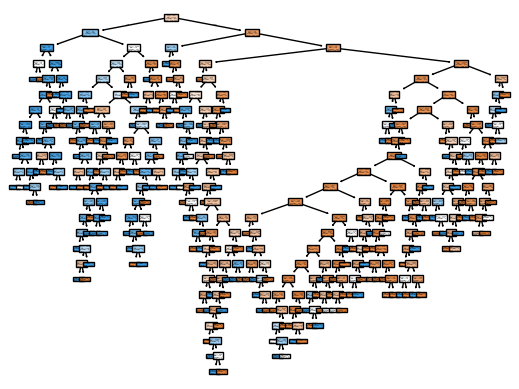

<Figure size 640x480 with 0 Axes>

In [11]:
tree.plot_tree(model.fit(X, y), filled=True)
plt.show()
plt.savefig("tree.png")

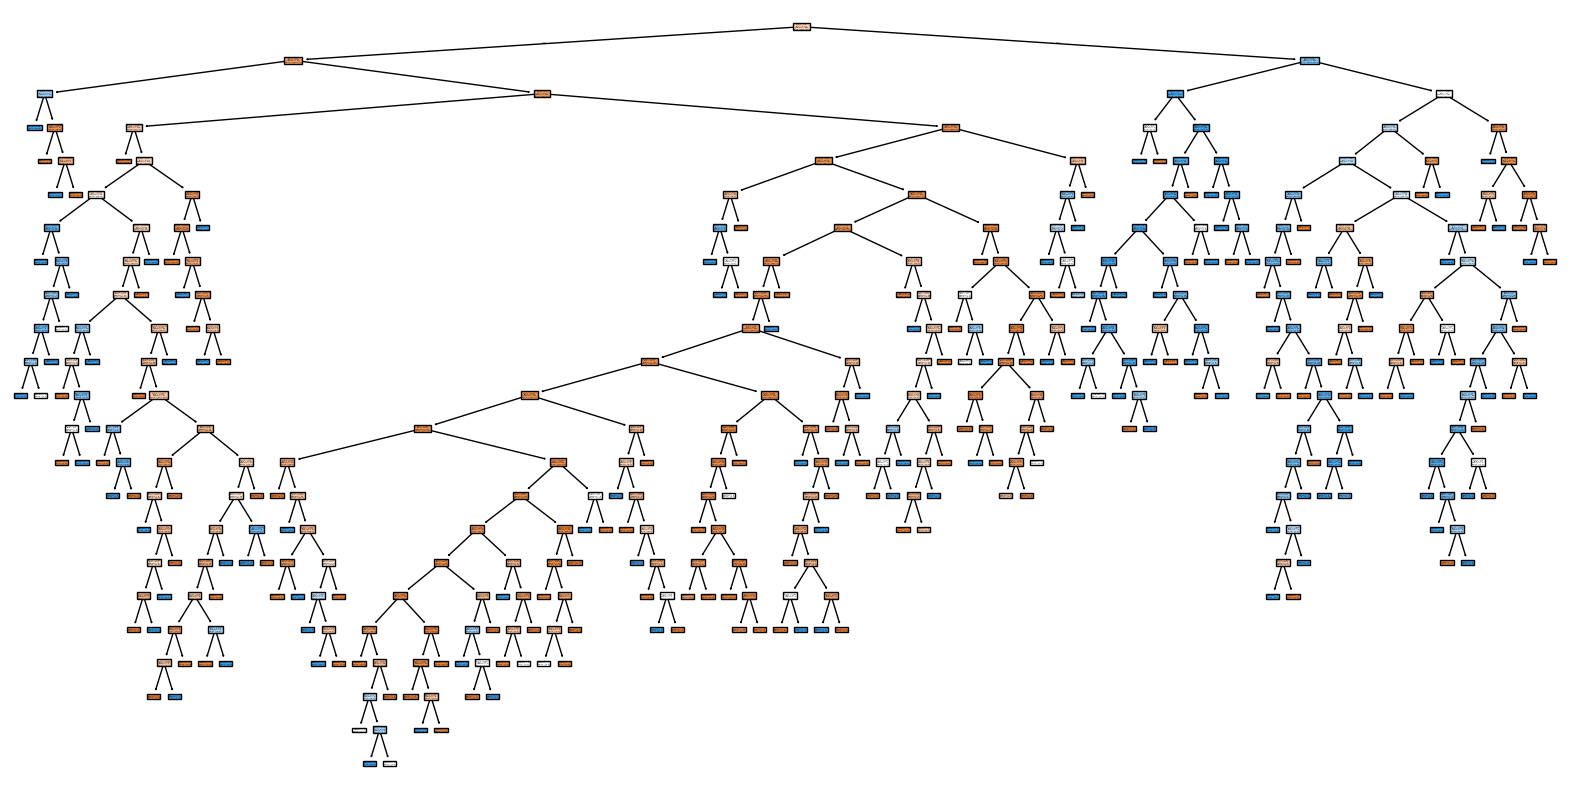

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt 
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X, y), filled=True)
plt.show()
plt.savefig("decision_tree.pdf", format='pdf', dpi=300)

In [13]:
#Assignment:
#Using the dataset of titanic and keeping (X, & y) same, train a model for decision tree classifier and calculate the three scores of decision classifier metrics (1. Precision_score, recall_score, f1_score)
# how to calculate the precision_score, recall_score and f_1 score?
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']


In [14]:
# The precision score in Python tells us the ratio of true positives to the sum of true positives and false positives. It is a measure of the accuracy of a classifier, 
# specifically the proportion of true instances among all predicted positive instances.

#In other words, precision is the ratio of correctly predicted positive instances to the total number of predicted positive instances.

In [15]:
# The recall score in Python tells us the proportion of true positives among all actual positive instances. 
# In other words, it measures how well a model detects all instances of a particular class.

In [16]:
# For binary classification
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred) # what does precision score tells us?
recall = recall_score(y_test, y_pred) # What does recall score tells us?
f1 = f1_score(y_test, y_pred) # f1_score is the harmonic mean of precision a7 recall score

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.631578947368421
Recall: 0.6575342465753424
F1 Score: 0.6442953020134228


In [17]:
# For multi-class classification (Average method can also be applied)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6944302503832396
Recall: 0.696691651589558
F1 Score: 0.6953533926335056


In [18]:
# create confussion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[78, 28],
       [25, 48]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

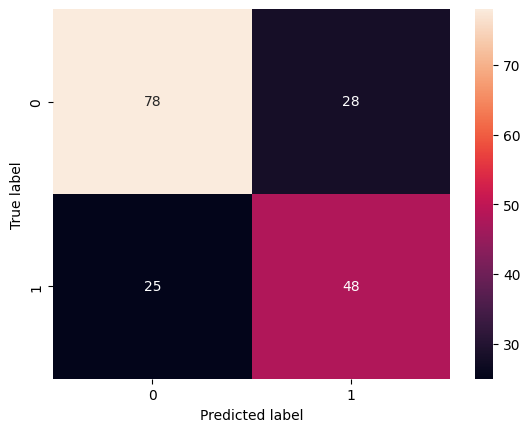

In [19]:
# How to plot confusion matrix. using heatmap
sns.heatmap(cm, annot = True, fmt = 'd')
plt.ylabel('True label')
plt.xlabel('Predicted label')